# PDAML CP9 Geant4 Exercises 2

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

## Write a Python program to calibrate your energy data. Plot a 1D histogram of the calibrated energy as shown, and find the resolution by taking the standard deviation of this data.

In [2]:
# Read data from ntuple output file
inputData = pd.read_csv( 'output_nt_Energy_500electrons.csv', comment='#', \
names=['TrueEnergy', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5'] )

In [3]:
inputData.head()

,TrueEnergy,Layer1,Layer2,Layer3,Layer4,Layer5
0,300,159.2330,9.07324,2.86212,0.102833,0.000000
1,300,156.9670,45.30870,19.45710,1.462070,0.000000
2,300,103.5770,29.54130,29.80570,6.092090,0.858629
3,300,18.7011,103.87300,35.89570,9.958900,2.742700
4,300,91.0581,57.72540,1.01131,1.911060,12.226800


In [4]:
# Returns array of (E_calib - E_true) / E_true values one for each event
def calibrate(df):
    E_true = df['TrueEnergy']
    # Ignore TrueEnergy column when summing over layers to get total detected energy for each event
    E_detect = df.iloc[:, 1:].sum(axis=1)
    calib = np.mean(E_true / E_detect)
    # Calibrate data by multiplying by calibration factor
    E_calib = E_detect * calib
    return (E_calib - E_true) / E_true

In [5]:
# Get distribution of calibrated energy deviation from true energy
calib_data = calibrate(inputData)
# Resolution is standard deviation, ddof=1 for N-1 in denominator
resolution = np.std(calib_data, ddof=1)

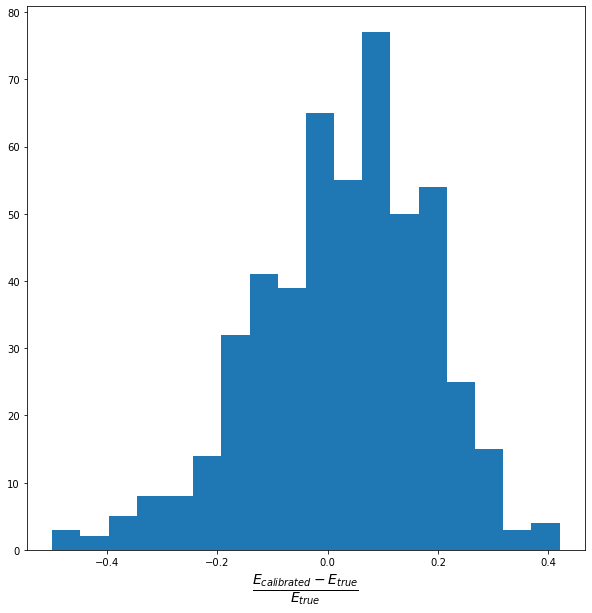

In [6]:
pl.figure(figsize=(10, 10))
pl.hist(calib_data, bins='auto')
pl.xlabel(r'$\frac{E_{calibrated}-E_{true}}{E_{true}}$', fontsize=20)
pl.show()

In [7]:
print('resolution: ', resolution)

resolution:  0.15735010766427907


## Make a 2D histogram showing how your calibrated energy varies with beam energy. Describe what beam energy values you used.

In [8]:
# New data to make 2D histogram
# Contains True energies from 100 MeV to 1900 MeV in increments of 200 MeV
# 500 events for each value of TrueEnergy
twoDhist_df = pd.read_csv( 'output_nt_Energy_2Dhist.csv', comment='#', \
names=['TrueEnergy', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5'] )

In [9]:
dfs = []
# Split into mini dataframes by TrueEnergy
for true_E in twoDhist_df['TrueEnergy'].unique():
    df = twoDhist_df[twoDhist_df['TrueEnergy'] == true_E]
    dfs.append(df)

true_energies = []
calibs = []
# Calibrate each individually based on its TrueEnergy
for df in dfs:
    true_energies += list(df['TrueEnergy'].values)
    calibs += list(calibrate(df))

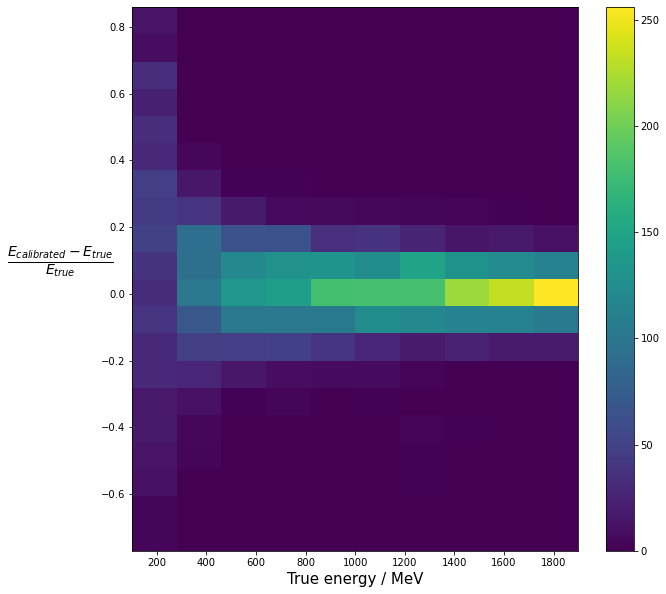

In [12]:
pl.figure(figsize=(10, 10))
pl.hist2d( x=true_energies, y=calibs, bins=(10, 20) )
pl.xlabel('True energy / MeV', fontsize=15)
pl.ylabel(r'$\frac{E_{calibrated}-E_{true}}{E_{true}}$', fontsize=20, rotation=0, labelpad=40)
pl.colorbar()
pl.show()

By visual inspection, using greater beam energy means calibrated energies are relatively closer to the true energy ie. resolution improves with increasing beam energy as expected due to there being more interactions happening.